$$\Huge \text{SKLEARN Supervised Learning}$$
$\Huge \text{ Regression}$
1. selectioner run estimateur et préciser ses hyperparameters:
```python
model=LinearRegression(...)
```
2. Entrainer le modèle sur les données X, y (divisiée en 2 tableaux Numpy)
```python
model.fit(X,y)
```
3. Évaluer le modèle

```python
model.score(X,y)
```
4. Utiliser le modèle
```python
model.predict(X)
```



In [127]:
import numpy as np
import matplotlib.pyplot as plt

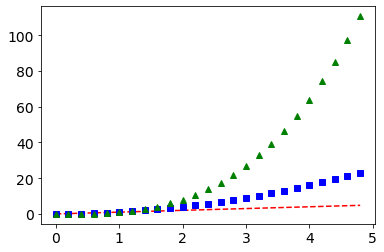

In [128]:
import numpy as np

# evenly sampled time at 200ms intervals
t = np.arange(0., 5., 0.2)

# red dashes, blue squares and green triangles
plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')
plt.show()

In [129]:
np.random.seed(42)
m=100 # creating 100 samples
X=np.linspace(0,10,m).reshape(m,1)
y=X+ np.random.randn(m,1)

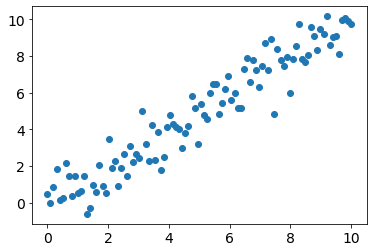

In [130]:
plt.scatter(X,y)

In [131]:
from sklearn.linear_model import LinearRegression

In [132]:
model=LinearRegression()
model.fit(X,y)
model.score(X,y)

0.9146941180074883

- C'est bien le coéficient de détermination. (R carré de la méthode des moindres carrés)

$\Huge R^2=1- \frac{ \sum_{i=1}^n (y_i-\hat y_i)^2 }{\sum_{i=1}^n (y_i-\bar y_i)^2}$

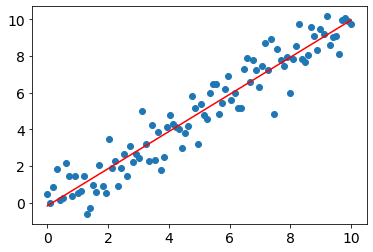

In [133]:
plt.scatter(X,y)
prediction=model.predict(X)
plt.plot(X, prediction, c="r")

- Pour un Dataset non lineair 


In [134]:
np.random.seed(42)
m=100 # creating 100 samples
X=np.linspace(0,10,m).reshape(m,1)
y=X**2+ np.random.randn(m,1)

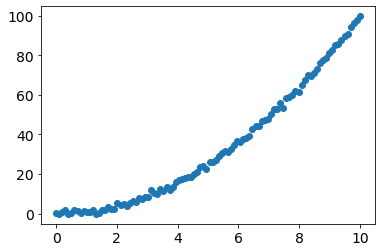

In [135]:
plt.scatter(X,y)


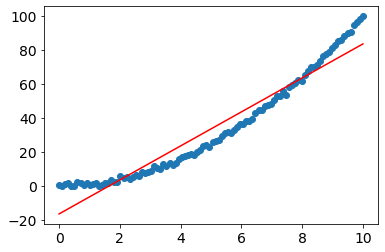

In [136]:
# Si je re-entraine mon modèle  
model=LinearRegression()
model.fit(X,y)
model.score(X,y)
plt.scatter(X,y)
prediction=model.predict(X)
plt.plot(X, prediction, c="r")

In [137]:
#. Donc ce cas il faur juste changer de modèle 
from  sklearn.svm import SVR

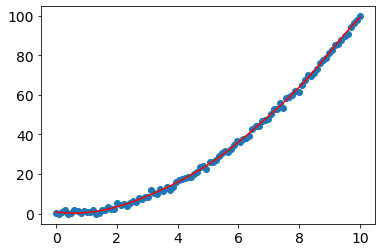

In [138]:
model=SVR(C=100)
y=y.ravel()
model.fit(X,y)
model.score(X,y)
plt.scatter(X,y)
prediction=model.predict(X)
plt.plot(X, prediction, c="r")

$\Huge \text{ Classification}$

In [7]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder

In [6]:
titanic=sns.load_dataset('titanic')
titanic.shape
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [14]:
titanic[["embarked", "sex", "who"]].isnull().sum()

embarked    2
sex         0
who         0
dtype: int64

In [17]:
titanic.dropna()
encoder=OrdinalEncoder()
titanic[["sex",  "who"]]=encoder.fit_transform(titanic[["sex",  "who"]])

In [18]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,1.0,22.0,1,0,7.2500,S,Third,1.0,True,NaN,Southampton,no,False
1,1,1,0.0,38.0,1,0,71.2833,C,First,2.0,False,C,Cherbourg,yes,False
2,1,3,0.0,26.0,0,0,7.9250,S,Third,2.0,False,NaN,Southampton,yes,True
3,1,1,0.0,35.0,1,0,53.1000,S,First,2.0,False,C,Southampton,yes,False
4,0,3,1.0,35.0,0,0,8.0500,S,Third,1.0,True,NaN,Southampton,no,True


In [141]:
titanic=titanic[['survived', 'pclass', 'sex', 'age']]
titanic.dropna(axis=0, inplace=True)
titanic['sex'].replace(['male','female'],[0,1], inplace=True)
titanic.head()

,survived,pclass,sex,age
0,0,3,0,22.0
1,1,1,1,38.0
2,1,3,1,26.0
3,1,1,1,35.0
4,0,3,0,35.0


In [142]:
from sklearn.neighbors import KNeighborsClassifier

In [143]:
model=KNeighborsClassifier()

In [144]:
y=titanic['survived']
X=titanic.drop('survived', axis=1)

In [145]:
model.fit(X,y)
model.score(X,y)

0.8319327731092437

In [146]:
model.predict(X)

array([0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,

In [147]:
def survie(model, pclass=3 , sex=0, age=55):
    x=np.array([pclass, sex, age]).reshape(1,3)
    # we should have 1 row and 3 columns
    print(model.predict(x))
    print(model.predict_proba(x))

In [148]:
survie(model )
# don j'ai 60%. de ne pas survivre au naufrage du Titanic (bien évidement  40% de chance de survivre)

[0]
[[0.8 0.2]]


[0.8473389355742297, 0.8585434173669467, 0.8585434173669467, 0.8403361344537815, 0.8319327731092437, 0.8221288515406162, 0.8207282913165266, 0.8109243697478992, 0.8179271708683473, 0.8053221288515406]
2


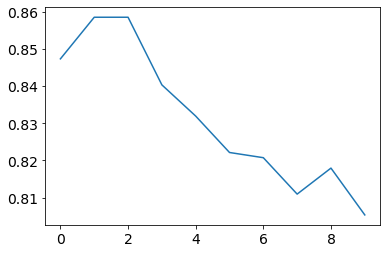

In [149]:
score=[]
best_score=0
best_k=1
for i in range(1,11):
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(X,y)
    score.append(model.score(X,y))
    if best_score< score[i-1]:
        best_score=score[i-1]
        best_k=i
print(score)
print(best_k)
plt.plot(score)
    
    
    

$\Huge  \text{Train Test Split}$

In [150]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

(150, 4)


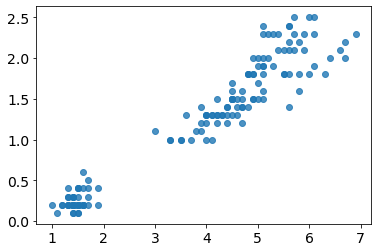

In [151]:
iris=load_iris()
X=iris.data
y=iris.target
print(X.shape)
plt.scatter(X[:, 2], X[:,3], alpha=0.8)

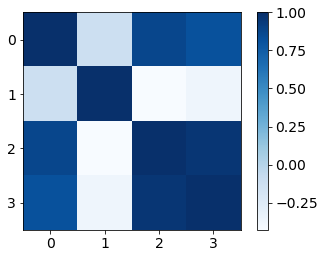

In [152]:
plt.imshow(np.corrcoef(X.T), cmap="Blues")
plt.colorbar()

In [153]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [154]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y , test_size=.2, random_state=5)

In [155]:
X_train.shape, X_test.shape

((120, 4), (30, 4))

Text(0.5, 1.0, 'Test set')

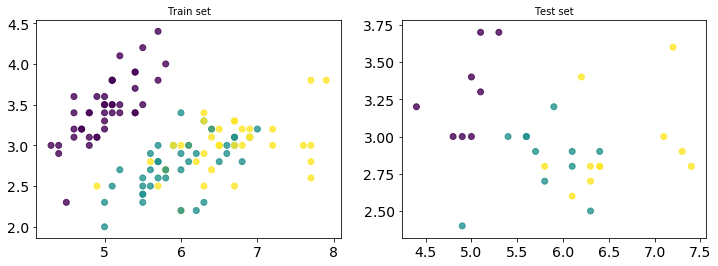

In [156]:
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, alpha=0.8)
plt.title('Train set')
plt.subplot(122)
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, alpha=0.8)
plt.title("Test set")

In [157]:
iris.data.T[0]

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
       4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
       5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
       5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. , 7. , 6.4,
       6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5. , 5.9, 6. , 6.1, 5.6,
       6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8, 6.7,
       6. , 5.7, 5.5, 5.5, 5.8, 6. , 5.4, 6. , 6.7, 6.3, 5.6, 5.5, 5.5,
       6.1, 5.8, 5. , 5.6, 5.7, 5.7, 6.2, 5.1, 5.7, 6.3, 5.8, 7.1, 6.3,
       6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5,
       7.7, 7.7, 6. , 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2,
       7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6. , 6.9, 6.7, 6.9, 5.8,
       6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9])

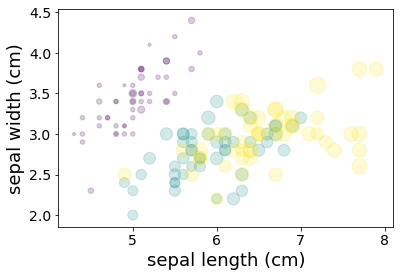

In [158]:
features = iris.data.T

plt.scatter(features[0], features[1], alpha=0.2,
            s=100*features[3], c=iris.target, cmap='viridis')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1]);

In [159]:
 from sklearn.neighbors import KNeighborsClassifier

In [160]:
model=KNeighborsClassifier(n_neighbors=1)
model.fit(X_train, y_train)
print("Train Score {}".format(model.score(X_train, y_train)))
# choix de x_trsain et. y_train.  n est pas judicieux 

Train Score 1.0


In [161]:
model=KNeighborsClassifier(n_neighbors=1)
model.fit(X_train, y_train)
print("test Score {}".format(model.score(X_test, y_test)))


test Score 0.9


In [162]:
# Ajustons les hyperparamters:  ici on choisi   n_neighbors=3
model=KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)
print("Train Score {}".format(model.score(X_train, y_train)))
print("test Score {}".format(model.score(X_test, y_test)))



Train Score 0.975
test Score 0.9333333333333333


$\large \text{Validation Set est essentiel ds la msure où on purra valiser notre model avant de passer aux tests} $

## Cross Validation

In [163]:
model=KNeighborsClassifier(n_neighbors=6)
model.fit(X_train, y_train)
print("Train Score {}".format(model.score(X_train, y_train)))
print("test Score {}".format(model.score(X_test, y_test)))

Train Score 0.9833333333333333
test Score 0.9666666666666667


In [164]:
from sklearn.model_selection import cross_val_score

In [165]:
cross_val_score(KNeighborsClassifier(), X_train, y_train, cv=5, scoring="accuracy")

array([1.        , 1.        , 1.        , 0.95833333, 0.95833333])

In [166]:
cross_val_score(KNeighborsClassifier(), X_train, y_train, cv=5, scoring="accuracy").mean()

0.9833333333333334

In [167]:
cross_val_score(KNeighborsClassifier(3), X_train, y_train, cv=5, scoring="accuracy").mean()

0.975

In [ ]:
score=[]
for i in range(1,50):
    score.append(cross_val_score(KNeighborsClassifier(i), X_train, y_train, cv=5, scoring="accuracy").mean())
plt.plot(score)
    
    
    

## Validation Curve

In [ ]:
from sklearn.model_selection import validation_curve

In [ ]:
model=KNeighborsClassifier()
k=np.arange(1,50)
train_score, val_score=validation_curve(model, X_train, y_train, 'n_neighbors', k, cv=5)
val_score.shape

In [ ]:
plt.plot(k,val_score.mean(axis=1), label="validation")
plt.plot(k,train_score.mean(axis=1), label="train")
plt.ylabel('score')
plt.xlabel('n_neighbors')
plt.legend()
print("overfitting: Le modèle s'est trop perfectionné sur le TrainSet et a perdu tout sens de généralisation")

$\text {Le modèle commence à "Overfit". Les erreurs sur le Train diminuent, mai scelles sur le Test Augmentent}$

## Pour mieux Ajuster les Hyperparamters on aura recours au GreadSearch CV
$\large  \text { Grid =GridSearchCV(model, param_grid, cv)}$
$ \text{ Construire une grille de modèles avec toutes les combinaiason d'hyperparameters présents dans param_grid}$

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid={'n_neighbors':np.arange(1,20), 'metric':['euclidean','manhattan']}
grid=GridSearchCV(KNeighborsClassifier(), param_grid, cv=9)

grid.fit(X_train, y_train)

$\large \text{La grille est un estimator!}$
- entrainement. : fit()
- **best_score_**
- **best_params_**
- **best_estimator_**

[Optimal Tuning Parameters](https://www.ritchieng.com/machine-learning-efficiently-search-tuning-param/)

In [ ]:
grid.best_score_

In [ ]:
grid.best_params_

In [ ]:
model=grid.best_estimator_

In [ ]:
model.score(X_test, y_test)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test, model.predict(X_test))

# Learning Curve

$\Large \text{learning_curve( model, X, y, train_size, cv=5)}$

$ \text{N, train_{score}, val_{score}}$

![image](https://chrisalbon.com/images/machine_learning_flashcards/Learning_Curve_print.png)

In [ ]:
from sklearn.model_selection import learning_curve

In [ ]:
N, train_score, val_score= learning_curve(model, X_train, y_train, train_sizes=np.linspace(0.2, 1.0, 5) , cv=5)
print(N)

In [ ]:
np.linspace(0.2, 1.0, 5)

In [ ]:
plt.plot(N, train_score.mean(axis=1), label="train")
plt.plot(N, val_score.mean(axis=1), label='validation')
plt.xlabel('train_sizes')
plt.legend()

In [ ]:
N, train_score, val_score= learning_curve(model, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10) , cv=5)
plt.plot(N, train_score.mean(axis=1), label="train")
plt.plot(N, val_score.mean(axis=1), label='validation')
plt.xlabel('train_sizes')
plt.legend()

In [ ]:
# reprise de titanic

In [ ]:
from sklearn.model_selection import train_test_split
X=titanic.drop('survived', axis=1)
y=titanic['survived']


X_train, X_test, y_train, y_test=train_test_split(X, y , test_size=.2, random_state=5)

In [ ]:
param_grid={'n_neighbors':np.arange(1,20), 'metric':['euclidean','manhattan']}
grid=GridSearchCV(KNeighborsClassifier(), param_grid, cv=9)

grid.fit(X_train, y_train)

In [ ]:
grid.best_estimator_

In [ ]:
grid.best_score_

In [ ]:
grid.best_params_

In [ ]:
model=grid.best_estimator_
model.score(X_test, y_test)

In [ ]:
confusion_matrix(y_test, model.predict(X_test))

# Create CV training and test scores for various training set sizes
train_sizes, train_scores, test_scores = learning_curve(RandomForestClassifier(), 
                                                        X, 
                                                        y,
                                                        # Number of folds in cross-validation
                                                        cv=10,
                                                        # Evaluation metric
                                                        scoring='accuracy',
                                                        # Use all computer cores
                                                        n_jobs=-1, 
                                                        # 50 different sizes of the training set
                                                        train_sizes=np.linspace(0.01, 1.0, 50))

In [ ]:
N, train_score, val_score= learning_curve(model, X_train, y_train, train_sizes=np.linspace(0.2, 1.0, 11), n_jobs=-1 , cv=11)
print(N)

In [ ]:
train_mean = np.mean(train_score, axis=1)
train_std = np.std(train_score, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(val_score, axis=1)
test_std = np.std(val_score, axis=1)

In [ ]:
plt.plot(N, train_score.mean(axis=1), label="train")
plt.plot(N, val_score.mean(axis=1), label='validation')
plt.xlabel('train_sizes')
plt.legend()
plt.fill_between(N, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(N, test_mean - test_std, test_mean + test_std, color="#DDDDDD")


In [ ]:
# interpolation 
x=np.linspace(-10, 10 , 20)
y=x**3
plt.scatter(x, y )

In [ ]:
from scipy.interpolate import interp1d
f=interp1d(x, y , kind='linear')
new_x=np.linspace(-10, 10   , 30)
result=f(new_x)
plt.scatter(x, y )
plt.scatter(new_x, result, c="r")

In [ ]:
# interpolation 
x=np.linspace(0, 10 , 10)
y=x**2
plt.scatter(x, y )

In [ ]:
from  scipy.interpolate import interp1d

In [ ]:
f=interp1d(x, y , kind="linear")
new_x=np.linspace(0, 10, 30)
result= f(new_x)
plt.scatter(x, y )
plt.scatter(new_x, result, c="r")

In [ ]:
# Exemple II
x=np.linspace(0, 10 , 10)
y=np.sin(x)


In [ ]:
f=interp1d(x, y , kind="linear")
new_x=np.linspace(0, 10, 30)
result= f(new_x)
plt.scatter(x, y )
plt.scatter(new_x, result, c="r")

In [ ]:
f=interp1d(x, y , kind="cubic")
new_x=np.linspace(0, 10, 30)
result= f(new_x)
plt.scatter(x, y )
plt.scatter(new_x, result, c="r")

# Optimize

In [ ]:
x=np.linspace(0,2,100)
y=1/3*x**3 -3/5*x**2 +2+np.random.randn(x.shape[0])/20
plt.scatter(x, y )

In [ ]:
def f(x, a,b,c,d):
    return a*x**3+b*x**2+c*x+d
from scipy import optimize
params, param_cov=optimize.curve_fit(f, x, y)
# matrice des covariances de notre modèle
#la première ligne retourne les diff coefcients   a, b ,c, et d

In [ ]:
plt.scatter(x, y )
plt.plot(x, f(x, params[0], params[1], params[2], params[3]), c='g',  lw=3)

# Minimize 

In [ ]:
def f(x):
    return x**2+15*np.sin(x)

In [ ]:
x=np.linspace(-10, 10, 100)
plt.plot(x, f(x))

In [ ]:
optimize.minimize(f, x0=-8)

In [ ]:
optimize.minimize(f, x0=-5)

In [ ]:
x0=-5
result=optimize.minimize(f, x0=x0).x

In [ ]:
plt.plot(x, f(x), lw=3, zorder=-1)
plt.scatter(result, f(result), s=100, c='r', zorder=1)
plt.scatter(x0, f(x0), s=200, marker='+', c='g', zorder=1)
plt.show()

## Traintement de signal 

In [ ]:
#signal  aléatoire
x=np.linspace(0, 20, 100)
y=x+4*np.sin(x)+np.random.randn(x.shape[0])
plt.plot(x, y )

In [ ]:
from scipy import signal 
# illiminer la linéarité sur les 2 axes.
new_y=signal.detrend(y)
plt.plot(x, y )
plt.plot(x, new_y)

## Transformation de fourrier 



In [ ]:
x=np.linspace(0, 30 , 1000)
y=3*np.sin(x)+2*np.sin(5*x)+np.sin(10*x)
plt.plot(x, y )

In [ ]:
from scipy  import fftpack

In [ ]:
fourrier=fftpack.fft(y)
frequences=fftpack.fftfreq(y.size)

In [ ]:
plt.plot(frequences, fourrier)

In [ ]:
fourrier=fftpack.fft(y)
power=np.abs(fourrier)
frequences=fftpack.fftfreq(y.size)
plt.plot(np.abs(frequences), power)

In [ ]:
np.random.seed(42)
X=np.zeros((32,32))
X

In [ ]:
X[3:-3, 3:-3]=1
X[3]

In [ ]:
from scipy import ndimage
from matplotlib import pyplot as plt


In [ ]:
# générer une matrice nulle de dimension  32x32  
np.random.seed(42)
X=np.zeros((32,32))
X[10:-10, 10:-10]=1
# mettre un 1 au sein de la matrice aléatoirement (dsitribution normale)
X[np.random.randint(0,32,30), np.random.randint(0,32,30)]=1
plt.imshow(X)

In [ ]:
open_x=ndimage.binary_opening(X)
plt.imshow(open_x)
plt.show()

In [ ]:
import numpy as np
from scipy import ndimage
from matplotlib import pyplot as plt
%matplotlib inline
# lecture du fichier 
image=plt.imread("imgs/bacteries.png")
#affiche de l'image
plt.imshow(image)

In [ ]:
#affichage des dimensions de l'image
image.shape

In [ ]:
# Supprimer les canaux de couleurs et de celui du degré d'opacité
image=image[:,:,0]
image.shape

In [ ]:
print(image)

In [ ]:
#faire une copie de l'image originale pour préserver cette dernière 
image1=np.copy(image)
# tranposer la matrice  de l'image et repartir le tout  sur 255 seaux
plt.hist(image1.ravel(), bins=255)
plt.show()

In [ ]:
image =image1<0.5

In [ ]:
plt.imshow(image)

-Opening  is a mathematical morphology operation [2] that consists in the succession of an erosion and a dilation of the input with the same structuring element. Opening therefore removes objects smaller than the structuring element.

In [ ]:
# operation de morphologie mathématique 
open_x=ndimage.binary_opening(image)
plt.imshow(open_x)

In [ ]:
label_image, n_label= ndimage.label(open_x)
print(n_label)

In [ ]:
sizes=ndimage.sum(open_x, label_image, range(n_label))

In [ ]:
plt.scatter(range(n_label), sizes, c='orange')

In [ ]:
from scipy import misc
import matplotlib.pyplot as plt

#f=plt.imread("imgs/face.png")
face=misc.face(gray=True)
plt.imshow(face, cmap="gray")
plt.hist(face.ravel(), bins=255)
plt.show()

In [ ]:
type(f)      
f.shape, f.dtype

In [ ]:
f=misc.face(gray=False)

In [ ]:
f.mean(), f.max(), f.min()

In [ ]:
plt.imshow(f, cmap=plt.cm.gray, vmin=30, vmax=200)  
plt.axis('off')      

In [ ]:
plt.imshow(f[320:340, 510:530], cmap=plt.cm.gray, interpolation='bilinear')

In [ ]:
plt.imshow(f[320:340, 510:530], cmap=plt.cm.gray, interpolation='nearest')

In [ ]:
from scipy import misc
f = misc.face(gray=True)

# Numpy Statistics & Mathematics

In [ ]:
np.random.seed(42)
X=np.random.randint(0,10,[2,3])
X

In [ ]:
# Méthode. ndarray

In [ ]:
X.sum()

In [ ]:
X.sum(axis=0)

In [ ]:
X.sum(axis=1)

In [ ]:
X.cumsum()

In [ ]:
X.cumsum(axis=1)

In [ ]:
X.prod()

In [ ]:
X.cumprod()

In [ ]:
X.min(axis=0)

In [ ]:
X.argmin(axis=0)

In [ ]:
np.exp(X)

In [ ]:
np.log(X)

In [ ]:
np.cos(X)

# Statitistics

In [ ]:
X.mean()

In [ ]:
X.mean(axis=0)

In [ ]:
X.std()

In [ ]:
X.var()

In [ ]:
np.corrcoef(X)

In [ ]:
np.corrcoef(X)[0,1]

In [ ]:
np.unique(X, return_counts=True)

In [ ]:
values, counts=np.unique(X, return_counts=True)

In [ ]:
counts

In [ ]:
counts.argsort()

In [ ]:
for i, j in zip(values[counts.argsort()], counts[counts.argsort()]):
    print(f'valeur{i} apparait {j} fois')

In [ ]:
# Nan Corrections
X=np.random.randn(5,5)
X[0,2]=np.nan
X[4,3]=np.nan
X

In [ ]:
X.mean()

In [ ]:
np.nanmean(X)

In [ ]:
np.nanvar(X)

In [ ]:
np.nanstd(X)

In [ ]:
np.isnan(X).sum()

In [ ]:
np.isnan(X).sum()/X.size

In [ ]:
X[np.isnan(X)]=0

In [ ]:
X

In [ ]:
# Algèbre Linéaire

In [ ]:
A=np.ones((2,3))
B=np.ones((3,2))
A

In [ ]:
A.T

In [ ]:
A.T.shape

In [ ]:
A.dot(B)

In [ ]:
B.dot(A)

In [ ]:
A=np.random.randint(0,10,[3,3])

In [ ]:
np.linalg.det(A)                                       

In [ ]:
np.linalg.inv(A)

In [ ]:
np.linalg.eig(A)

In [ ]:
np.random.seed(0)
X=np.linspace(0,4, 100).reshape(100,1)

In [ ]:
y=2+X**1.3+np.random.randn(100,1)
y=y.ravel()

In [ ]:
plt.scatter(X,y)
plt.xlabel('X')
plt.ylabel('y')

In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X,y)
y_pred=model.predict(X)

In [ ]:
plt.scatter(X, y)
plt.plot(X, y_pred, c='r', lw=3)

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y, y_pred)

In [ ]:
plt.figure(figsize=(9,6))
plt.scatter(X,y)
plt.plot(X, y_pred, c='r', lw=3)
plt.plot(X, y+y*.2, c='g', ls='--')
plt.plot(X, y-y*.2, c='g', ls='--')

In [ ]:
def custom_metric(y, y_pred):
    return np.sum( (y_pred<y+y*.2) & (y_pred > y-y*.2))/y.size
custom_metric(y, y_pred)

In [ ]:
from  sklearn.metrics import make_scorer

In [ ]:
custom_score=make_scorer(custom_metric, greater_is_better=True)

In [ ]:
from sklearn.model_selection import cross_val_score , GridSearchCV
cross_val_score(LinearRegression(), X, y, cv=3, scoring=custom_score)

In [ ]:
from sklearn.svm import SVR

In [ ]:
model=SVR(kernel='rbf', degree=3)
params={'gamma':np.arange(0,0.1,0.05)}
grid=GridSearchCV(model, param_grid=params, cv=3, scoring=custom_score)
grid.fit(X,y)

In [ ]:
best_model=grid.best_estimator_

In [ ]:
y_pred= best_model.predict(X)
custom_metric(y, y_pred)

In [ ]:
plt.figure(figsize=(9,6))
plt.scatter(X,y)
plt.plot(X, y_pred, c='r', lw=3)
plt.plot(X, y+y*.2, c='g', ls='--')
plt.plot(X, y-y*.2, c='g', ls='--')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, LabelBinarizer, OneHotEncoder

In [ ]:
y= np.array(['chat', 'chien', 'chat', 'oiseau'])

In [ ]:
encoder=LabelEncoder()

In [ ]:
encoder.fit(y)

In [ ]:
encoder.classes_

In [ ]:
encoder.fit_transform(y)

In [ ]:
encoder.inverse_transform(np.array([0,0,2,2]))

In [ ]:
# short Forme
y= np.array(['chat', 'chien', 'chat', 'oiseau'])
encoder=LabelEncoder()
encoder.fit_transform(y)

In [ ]:
y_test=np.array(['poisson'])
encoder.transform(y_test)

In [ ]:
#Ordinal Encoder
y= np.array([['chat', 'chien'], ['scopion', 'Vache'] , ['chat', 'Plumes']])

In [ ]:
encoder=OrdinalEncoder()
encoder.fit_transform(y)

In [ ]:
# Onehot Encoder. LabelBinarizer
# short Forme
y= np.array(['chat', 'chien', 'chat', 'oiseau'])
encoder=LabelBinarizer()
encoder.fit_transform(y)

In [ ]:
# Sparse Version
# short Forme
y= np.array(['chat', 'chien', 'chat', 'oiseau'])
encoder=LabelBinarizer(sparse_output=True)
encoder.fit_transform(y)

In [ ]:
X=np.array([['chat', 'chien'], ['scopion', 'Vache'] , ['chat', 'Plumes']])
encoder=OneHotEncoder()
encoder.fit_transform(X)

# Normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler
X=np.array([[70], [80],[120]])
scaler=MinMaxScaler()
scaler.fit_transform(X)

In [ ]:
X_test=np.array([[90]])
scaler.transform(X_test)

In [ ]:
#. Exemple. 
from sklearn.datasets import load_iris
df=load_iris()
X=df.data

In [ ]:
# plot
plt.scatter(X[:,2], X[:,3]) 
plt.show()

In [ ]:
X_minmax=MinMaxScaler().fit_transform(X)
plt.scatter(X[:,2], X[:,3]) 
plt.scatter(X_minmax[:,2], X_minmax[:,3]) 
plt.show()




# Standadization 

In [ ]:
from sklearn.preprocessing import StandardScaler

X=np.array([[70], [80],[120]])
scaler=StandardScaler()
scaler.fit_transform(X)



In [ ]:
#. Exemple. 
from sklearn.datasets import load_iris
df=load_iris()
X=df.data
X_minmax=MinMaxScaler().fit_transform(X)
X_std=StandardScaler().fit_transform(X)
plt.scatter(X[:,2], X[:,3], label="original") 
plt.scatter(X_minmax[:,2], X_minmax[:,3], label="Norm", s=30 ,alpha=.2) 
plt.scatter(X_std[:,2], X_std[:,3], label="Stand", s=50, alpha=.5) 
plt.legend()
plt.show()



Eviter d'utilise MinMaxScaler ou bien SatandardScaler en présence d'outliers. Cela rend les données moins exploitable`

# RObust  Scaler

In [ ]:
#. Exemple. 
from sklearn.datasets import load_iris
from sklearn.preprocessing import RobustScaler
df=load_iris()
X=df.data
outliers=np.full((10,4), 100)+ np.random.randn(10,4)
X=np.vstack((X, outliers))
X_robust=RobustScaler().fit_transform(X)
X_minmax=MinMaxScaler().fit_transform(X)
X_std=StandardScaler().fit_transform(X)
plt.figure(figsize=(10,8))
plt.scatter(X[:,2], X[:,3], label="original") 
plt.scatter(X_minmax[:,2], X_minmax[:,3], label="Norm", s=30 ,alpha=.2) 
plt.scatter(X_std[:,2], X_std[:,3], label="Stand", s=50, alpha=.5) 
plt.scatter(X_robust[:,2], X_robust[:,3], label="Robust", s=50, alpha=.5) 


plt.legend()
plt.show()

# Polynomial features

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
X=np.array([[1], [2],[0.5]])
PolynomialFeatures(3).fit_transform(X)

In [ ]:
X=np.linspace(0,4,100).reshape(100,1)
y=X**2+5*np.cos(X)+np.random.randn(100,1)
plt.scatter(X, y )

model=LinearRegression().fit(X,y)
y_pred=model.predict(X)
plt.plot(X, y_pred, c='r', lw=3)

In [ ]:
X=np.linspace(0,4,100).reshape(100,1)
y=X**2+5*np.cos(X)+np.random.randn(100,1)
plt.scatter(X, y )
# onva créer un polynome de degré 3 
X_poly= PolynomialFeatures(3).fit_transform(X)
model=LinearRegression().fit(X_poly,y)
y_pred=model.predict(X_poly)
plt.plot(X, y_pred, c='r', lw=3)

In [ ]:
from sklearn.preprocessing import PowerTransformer
X= np.random.rand(100, 2) +np.random.randn(100,2)
plt.hist(X[:,0], bins=30, alpha=0.7, label=0.7)
plt.show()


In [ ]:
from sklearn.preprocessing import PowerTransformer
X= np.random.rand(100, 2) +np.random.randn(100,2)
X2= PowerTransformer().fit_transform(X)
plt.hist(X[:,0], bins=30, alpha=0.7, label="original")
plt.hist(X2[:,0], bins=30, alpha=0.7, label="PoweTransform")

plt.legend()
plt.show()

# binarizer 

In [ ]:
from sklearn.preprocessing import  Binarizer, KBinsDiscretizer
X=np.linspace(0,5,10).reshape(10, 1)
X

In [ ]:
# toute les valeurs ui sont inferieures à 3 sont codées en 0 et les autres en 1
np.hstack((X,Binarizer(threshold=3).fit_transform(X)))

In [ ]:
KBinsDiscretizer(n_bins=6).fit_transform(X).toarray()

In [ ]:
pwd

![](imgs/pipeline.png)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.datasets import load_iris
iris=load_iris()
X=iris.data
y=iris.target
X_train, X_test, y_train ,y_test=train_test_split(X, y , test_size=0.7, random_state=42)

In [ ]:
# transformer 
X_train_transformed=StandardScaler().fit_transform(X_train)

In [ ]:
#estimator
model=SGDClassifier(random_state=0)
model.fit(X_train_transformed, y_train)

In [ ]:
# test
X_test_transformed=scaler.transform(X_test)
model.predict(X_test_transformed)

$$\Huge Pipeline $$
$$\large \text{COMPOSITE   \  Estimator}$$

![](imgs/pipeline0.png)
![](imgs/pipeline_1.png)
![](imgs/pipeline2.png)
![](imgs/pipeline3.png)

In [ ]:
from sklearn.pipeline import make_pipeline
model=make_pipeline(StandardScaler(),SGDClassifier())

In [ ]:
model.fit(X_train, y_train)
model.predict(X_test)

- ON peut utiliser GridSearchCv pour trouver les meilleurs parameters du  pipeline. 
```python
params={ <composant_ _ paramètres>: [] }
grid=GridSearchCV(pipeline, params, cv)
grid.fit(X_train, y_train)
grid.best_estimator
```


In [ ]:
from sklearn.model_selection import GridSearchCV
model=make_pipeline(
PolynomialFeatures(), StandardScaler(), SGDClassifier(random_state=0)
)
model

In [ ]:
params={
    "polynomialfeatures__degree":[2,3,4],
    "sgdclassifier__penalty": ['l1', 'l2']
}
grid=GridSearchCV(model, param_grid=params,cv=4 )
grid.fit(X_train, y_train)

In [ ]:
grid.best_params_

In [ ]:
grid.score(X_test, y_test)

In [ ]:
# Si on compare le modèle précédent avec celui sans aucun traitement  on aura 

In [ ]:
model=SGDClassifier(random_state=0)
model.fit(X_train, y_train)
model.score(X_test, y_test)

# le plus important c'est la qualité des données

In [ ]:
from sklearn.linear_model import SGDClassifier
X = [[0., 0.], [1., 1.]]
y = [0, 1]
clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=15)
clf.fit(X, y)

In [ ]:
clf.predict([[2., 2.]])

In [ ]:
clf.coef_

In [ ]:
clf.intercept_

In [ ]:
clf.decision_function([[2., 2.]])

In [ ]:
clf = SGDClassifier(loss="log", max_iter=5).fit(X, y)
clf.predict_proba([[1., 1.]])

# Impute in Sklearn 

In [ ]:
from sklearn.impute import SimpleImputer
import numpy as np
X=np.array([[10,3], [0,4], [5,3], [np.nan, 3]])

In [ ]:
# Transform(X_test) remplace les valeurs manquantes par les moyennes calculées sur le X_train
imputer=SimpleImputer(missing_values=np.nan, strategy='mean') 
imputer.fit_transform(X)

In [ ]:
X_test=np.array([[12,5], [40,2], [5,5], [np.nan, np.nan]])
imputer.transform(X_test)

# KNNimputer

In [ ]:
from sklearn.impute import KNNImputer
X=np.array([[1,100], [2,30], [5,15], [np.nan, 20]])

In [ ]:
imputer=KNNImputer(n_neighbors=1)
imputer.fit_transform(X)

# MissingIndicator

In [ ]:
# valeur booléenne qui indique l'absence de certains valeurs dans notre dataset
# le manque d'information peut représenter uen information.
from sklearn.impute import MissingIndicator
X=np.array([[1,100], [2,30], [5,15], [np.nan, np.nan]])
MissingIndicator().fit_transform(X)

In [ ]:
# utiliser un pipeline pour traiter notre dataset avec plusieurs algorithme et les concattiner par la suite
from sklearn.pipeline import make_union
pipeline=make_union(SimpleImputer(strategy="constant", fill_value=-99),
                    MissingIndicator())
pipeline.fit_transform(X)

# Application. imputer. 
- on va utiliser GridSearchCV pour chercher les meilleurs paramètres de notre pipeline

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.impute import KNNImputer
import seaborn as sns
titanic=sns.load_dataset("titanic")
titanic.head()

In [ ]:
X=titanic[["pclass", "age"]]
y=titanic["survived"]
X_train, X_test, y_train, y_test=train_test_split(X, y , test_size=0.3, random_state=42)

In [ ]:
model=make_pipeline(KNNImputer(), SGDClassifier())
model

In [ ]:
params={"knnimputer__n_neighbors":[1,2,3,4]}

In [ ]:
grid=GridSearchCV(model, param_grid=params, cv=5)

In [ ]:
grid.fit(X_train, y_train)

In [ ]:
grid.best_estimator_

In [ ]:
grid.best_params_

In [ ]:
pwd


# PIpeline In sklearn 

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.externals import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [ ]:
df=load_iris()


In [ ]:
X_train, X_test, y_train, y_test=train_test_split(df.data, df.target, test_size=0.3, random_state=42)

### Pipelines Creation 
1. Data Preprocessing by using StandardScaler
2. Reduce Dimension using PCA
3. Apply CLassifier

In [ ]:
import pandas as pd
X = pd.DataFrame(
    {'city': ['London', 'London', 'Paris', 'Sallisaw'],
     'title': ["His Last Bow", "How Watson Learned the Trick",
               "A Moveable Feast", "The Grapes of Wrath"],
     'expert_rating': [5, 3, 4, 5],
     'user_rating': [4, 5, 4, 3]})

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import OneHotEncoder
column_trans = ColumnTransformer(
    [('city_category', OneHotEncoder(dtype='int'),['city']),
     ('title_bow', CountVectorizer(), 'title')],
    remainder='drop')

column_trans.fit(X)




column_trans.get_feature_names()

In [ ]:
from sklearn import tree
features=[[140, 1], [120,1], [150, 0], [70,0]]
labels=[0,0,1,1]
clf=tree.DecisionTreeClassifier()
clf=clf.fit(features, labels)
print(clf.predict([[150,0]]))

In [ ]:
clf

# Time Series

In [ ]:
pwd

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df=pd.read_csv("data/BTC-USD.csv")
df.head()

In [ ]:
df.Close.plot(figsize=(9,6))

In [ ]:
sns.lineplot( df.index ,df.Close)

In [ ]:
df.index

In [ ]:
# we ll reload out dataset but with Date as index
df=pd.read_csv("data/BTC-USD.csv", index_col="Date")
df.head()

In [ ]:
df.Close.plot(figsize=(9,6))

In [ ]:
# Et pour vaoit un index de typr Date on rectifie le tir ainsi 
# we ll reload out dataset but with Date as index
df=pd.read_csv("data/BTC-USD.csv", index_col="Date", parse_dates=True)
df.head()

In [ ]:
df["2020"]["Close"].plot()

In [ ]:
df["2020-01"]["Close"].plot()

In [ ]:
df["2019":"2020"]["Close"].plot()

In [ ]:
df.loc["2019":"2020", "Close"].plot()

In [ ]:
df.loc["3 march 2017":, "Close"].plot()

In [ ]:
df.loc["2020", "Close"].resample("M").plot()

In [ ]:
#. plot the mean 
df.loc["2019", "Close"].resample("M").mean().plot()

In [ ]:
# we can proceed onthe same way woth Weeks 
df.loc["2019", "Close"].resample("W").mean().plot()

In [ ]:
# every 2 weeks 
df.loc["2019", "Close"].resample("2w").mean().plot()

In [ ]:
# let's computer the Std on 2 weeks 
df.loc["october 2019":, "Close"].resample("2w").std().plot()

In [ ]:
plt.figure(figsize=(12,8))
df.loc["2019", "Close"].plot()
df.loc["2019", "Close"].resample("M").mean().plot(label=" Mean per Month", lw=3,ls=":", alpha=.8)
df.loc["2019", "Close"].resample("w").mean().plot(label=" Mean per Month", lw=3,ls="--", alpha=.8)
plt.legend()


In [ ]:
df.loc["2019", "Close"].resample("M").agg(["mean", "std", "min", "max"]).head()

In [ ]:
plt.figure(figsize=(12,8))
m=df.loc["2019", "Close"].resample("M").agg(["mean", "std", "min", "max"]).head()
m["mean"].plot(label=" Moyenne par semaine")
plt.fill_between(m.index, m["max"], m["min"], alpha=.2, label='minmax par semaine')
plt.legend()
plt.show()

In [ ]:
sns.lineplot(m.index, m["max"]  )

$$\large \text{PYTHON SKLEARN - MODEL SELECTION : Train_test_split, Cross Validation, GridSearchCV} $$

In [ ]:
dataset={f"experience{i}": np.random.randn(100) for i in range(4)}

In [ ]:
dataset["experience0"][:10]

In [ ]:
#. to use. within National Exam   DirInfo Project.
sb.pairplot(rd,hue='Class',palette='Set1',height=3);


In [ ]:
intercept = model.intercept_

coefficient = model.coef_

#model.score(X_test,y_test)

print('Temperature = {0:0.2f} + ({1:0.2f} x Humidity)'.format(intercept, coefficient[0]))

In [ ]:
#density plot of the residuals to check wether the model fits the data very well abd have normally distributed residuals.
sns.distplot((y_test - predictions), bins = 50)


from sklearn import metrics
import numpy as np
metrics_df = pd.DataFrame({'Metric': ['MAE',

                                      'MSE',

                                      'RMSE',

                                      'R-Squared'],

                          'Value': [metrics.mean_absolute_error(y_test, predictions),

                                    metrics.mean_squared_error(y_test, predictions),

                                    np.sqrt(metrics.mean_squared_error(y_test, predictions)),

                                    metrics.explained_variance_score(y_test, predictions)]}).round(3)

print(metrics_df)
#      Metric   Value
#        MAE   6.052
#        MSE  56.187
#       RMSE   7.496
#  R-Squared   0.389
#Target explained only 38.9% of the variance in temperature. Additionally,
#our predictions were within ± 6.052 degrees Celsius.

In [ ]:
g = sb.PairGrid(rd, hue="Class",palette='Set1')
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend();

In [ ]:
import pandas as pd, numpy as np

df = pd.DataFrame({'GPA': [99, 53, 71, 84, 84],
                   'Name': ['Betty', 'Djamel', 'Ramzi', 'Alexa', 'Adel']})

bins = [0, 50, 60, 70, 80, 100]
names = ['F', 'D', 'C', 'B', "A"]

d = dict(enumerate(names, 1))

df['Rank'] = np.vectorize(d.get)(np.digitize(df['GPA'], bins))

In [ ]:
plt.figure(figsize=(10,5))
chart = sns.countplot(
    data=data[data['Year'] == 1980],
    x='Sport',
    palette='Set1'
)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support

clf = SVC(kernel = 'linear').fit(x_train,y_train)
clf.predict(x_train)
y_pred = clf.predict(x_test)

# Creates a confusion matrix
cm = confusion_matrix(y_test, y_pred) 

# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     index = ['setosa','versicolor','virginica'], 
                     columns = ['setosa','versicolor','virginica'])

plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, annot=True)
plt.title('SVM Linear Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

[Education DataMining](https://github.com/darkprinx/Student-Academic-Performance-Level-Classification/blob/master/Data%20Mining%20project%20Code.ipynb)

In [ ]:
24 % 5

In [ ]:
0x10>>2


In [ ]:
a=4
a=float(a)
a

In [ ]:
a*2**10

In [ ]:
type (a)

In [ ]:
def pvaluation(n, p, k): 
    for i in range(n, 1, -1):
        # saubaegarder la valeur i ds X pour ne par modifer le compteur
        x=i
        # j entame la boucle 
        # ssi x  divise par p 
        while (x % p == 0):
            #  j imcremente k , et j'affect le reste de la diciion entiered de x par p  à x
            k +=1
            x= x//p
    return k 
pvaluation(25, 5, 0)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# set the data
x_data = np.linspace(0, 10)
y_data_1 = np.sin(x_data)
y_data_2 = np.cos(x_data)
y_data_3 = [i / 2 for i in y_data_1]
y_data_4 = [j / 2 for j in y_data_2]

# make the plot
ax1 = plt.subplot(2,3,1)
plt.plot(x_data, y_data_1)

ax2 = plt.subplot(2,3,2, sharey=ax1)
plt.plot(x_data, y_data_1)
plt.plot(x_data, y_data_2)

ax3 = plt.subplot(1,3,3)
plt.plot(x_data)

ax4 = plt.subplot(2,3,4, sharex=ax1)
plt.plot(x_data, y_data_1)
plt.plot(x_data, y_data_2)
plt.plot(x_data, y_data_3)

ax5 = plt.subplot(2,3,5, sharex=ax2, sharey=ax4)
plt.plot(x_data, y_data_1)
plt.plot(x_data, y_data_2)
plt.plot(x_data, y_data_3)
plt.plot(x_data, y_data_4)

plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import (KNeighborsClassifier,
                               NeighborhoodComponentsAnalysis)
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


In [ ]:

print(__doc__)

n_neighbors = 3
random_state = 0

# Load Digits dataset
X, y = datasets.load_digits(return_X_y=True)

# Split into train/test
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.5, stratify=y,
                     random_state=random_state)


In [ ]:

dim = len(X[0])
n_classes = len(np.unique(y))

# Reduce dimension to 2 with PCA
pca = make_pipeline(StandardScaler(),
                    PCA(n_components=2, random_state=random_state))


In [ ]:

# Reduce dimension to 2 with LinearDiscriminantAnalysis
lda = make_pipeline(StandardScaler(),
                    LinearDiscriminantAnalysis(n_components=2))

In [ ]:
# Reduce dimension to 2 with NeighborhoodComponentAnalysis
nca = make_pipeline(StandardScaler(),
                    NeighborhoodComponentsAnalysis(n_components=2,
                                                   random_state=random_state))

In [ ]:
# Use a nearest neighbor classifier to evaluate the methods
knn = KNeighborsClassifier(n_neighbors=n_neighbors)

In [ ]:

# Make a list of the methods to be compared
dim_reduction_methods = [('PCA', pca), ('LDA', lda), ('NCA', nca)]

In [ ]:
# plt.figure()
for i, (name, model) in enumerate(dim_reduction_methods):
    plt.figure()
    # plt.subplot(1, 3, i + 1, aspect=1)

    # Fit the method's model
    model.fit(X_train, y_train)

    # Fit a nearest neighbor classifier on the embedded training set
    knn.fit(model.transform(X_train), y_train)

    # Compute the nearest neighbor accuracy on the embedded test set
    acc_knn = knn.score(model.transform(X_test), y_test)

    # Embed the data set in 2 dimensions using the fitted model
    X_embedded = model.transform(X)

    # Plot the projected points and show the evaluation score
    plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y, s=30, cmap='Set1')
    plt.title("{}, KNN (k={})\nTest accuracy = {:.2f}".format(name,
                                                              n_neighbors,
                                                              acc_knn))
    
plt.show()

# Pipeline. avancée



In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import SGDClassifier
from sklearn.impute import SimpleImputer
import seaborn as sns

In [224]:
df=sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [225]:
y=df.survived
X=df.drop("survived", axis=1)

In [226]:
from sklearn.compose import make_column_transformer

In [227]:
transformer=make_column_transformer((StandardScaler(), ["age", "fare"]))

In [228]:
transformer.fit_transform(X)

array([[-0.53037664, -0.50244517],
       [ 0.57183099,  0.78684529],
       [-0.25482473, -0.48885426],
       ...,
       [        nan, -0.17626324],
       [-0.25482473, -0.04438104],
       [ 0.15850313, -0.49237783]])

In [ ]:
# Par la suite on pourra passer au pipeline 
# model=make_pipeline(transformer, SGDClassifier())
# model.fit(X,y)

In [229]:
data_column_category = df.select_dtypes(exclude=[np.number]).columns
data_column_category

Index(['sex', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [ ]:
numerical_features=["pclass", "age", "fare"]
categorical_features=["sex", "deck", "alone"]

In [ ]:
numerical_pipeline=make_pipeline( SimpleImputer(), StandardScaler())
categorical_pipeline=make_pipeline(SimpleImputer(strategy="most_frequent"), 
                                  OneHotEncoder())

In [ ]:
preprocessor= make_column_transformer( (numerical_pipeline , numerical_features),
                       (categorical_pipeline,   categorical_features))

In [ ]:
model=make_pipeline(preprocessor, SGDClassifier())
model.fit(X, y )

# L'usage de make_colum_selector

In [ ]:
from sklearn.compose import make_column_selector

In [ ]:
numerical_features=make_column_selector(dtype_include=np.number)
categorical_features=make_column_selector(dtype_exclude=np.number)

In [ ]:
numerical_pipeline=make_pipeline( SimpleImputer(), StandardScaler())
categorical_pipeline=make_pipeline(SimpleImputer(strategy="most_frequent"), 
                                  OneHotEncoder())

In [ ]:
preprocessor= make_column_transformer( (numerical_pipeline , numerical_features),
                       (categorical_pipeline,   categorical_features))

In [ ]:
model=make_pipeline(preprocessor, SGDClassifier())
model.fit(X, y )

# Digit. Prediction 

In [207]:
import matplotlib.pyplot as plt
from sklearn import datasets, svm
# load Data
df=datasets.load_digits()

In [208]:
n_sample=len(df.images)
data=df.images.reshape((n_sample, -1))
# Learn and Fit
classifier= svm.SVC()
classifier.fit(data[:n_sample //2], df.target[:n_sample //2])

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [210]:
# predict and plot
for index, image in enumerate(df.images[n_sample //2: n_sample //2 +4]):
    print(i, type(i))
#     plt.subplot(1, 4, index)
#     plt.imshow(image, cmap=plt.cm.gray_r)
#     plt.title("Prediction :  %i "  % classifier.predict(image.ravel()), fontsize=20)
    

42 <class 'int'>
42 <class 'int'>
42 <class 'int'>
42 <class 'int'>


In [223]:
a, b= enumerate(df.images[100,103]) #df.images[n_sample //2: n_sample //2 +4])

IndexError: index 103 is out of bounds for axis 1 with size 8

In [214]:
df.images.shape

(1797, 8, 8)

In [212]:
n_sample //2

898

# GroupBy

In [198]:
import pandas as pd
df = pd.DataFrame({'A': [1, 1, 2, 2],
              'B': [1, 2, 3, 4],
                  'C': np.random.randn(4)})

In [199]:
df

,A,B,C
0,1,1,-0.837581
1,1,2,0.677186
2,2,3,1.872319
3,2,4,0.396374


In [200]:
df.groupby("A").agg("min")

,B,C
A,,
1,1,-0.837581
2,3,0.396374


In [201]:
df.groupby("A").agg(["mean", "max"])

B             C          
  mean max      mean       max
A                             
1  1.5   2 -0.080198  0.677186
2  3.5   4  1.134347  1.872319

In [202]:
df.groupby("A").B.agg(["mean", "max"])

,mean,max
A,,
1,1.5,2
2,3.5,4


In [203]:
df.groupby("A").agg({
    "B":["mean", "max"],
    "C":"max"
})

B             C
  mean max       max
A                   
1  1.5   2  0.677186
2  3.5   4  1.872319

In [ ]:
df.groupby("A").agg({"B":["mean", "max"]})

In [ ]:
!pip install --upgrade  pandas

In [ ]:
df=pd.read_csv("http://bit.ly/imdbratings")

In [ ]:
df.head()

In [ ]:
import seaborn as sns

In [ ]:
tips=sns.load_dataset("tips")

In [ ]:
tips_gp=tips.groupby(["sex", "smoker"])

In [ ]:
tips.keys()

In [ ]:
tips_agg=tips_gp.agg({
    "tip":["min", "mean"], 
    "total_bill":"size"
})
tips_agg

In [ ]:
tips_agg.reset_index()

In [ ]:
tips_gp=tips.groupby(["day","time"])

In [ ]:
median_size=tips_gp.agg({"size":"sum"}).median()[0]
median_size

In [ ]:
tips_gp.filter(lambda gp:  gp["size"].sum() <median_size)

In [ ]:
tips_gp=tips.groupby(by="day")
tips_gp.head()

In [ ]:
x, y = np.random.randn(2, 5000).cumsum(axis=1)
sns.lineplot(x=x, y=y, sort=False, lw=1)

In [ ]:
y[:10]

## Pandas   GroupBy 

In [ ]:

order_leads=pd.read_csv("https://raw.githubusercontent.com/FBosler/Medium-Data-Exploration/master/order_leads.csv", parse_dates=[3])

In [ ]:

sales_team=pd.read_csv("https://raw.githubusercontent.com/FBosler/Medium-Data-Exploration/master/sales_team.csv", parse_dates=[3])
df=pd.merge(order_leads, sales_team, on=['Company Id', 'Company Name'])

In [ ]:
df=df.rename(
columns={'Order Value':'Val', 'Converted':'Sale'})
df.head()

In [ ]:
grouped=df.groupby('Sales Rep')
grouped

In [ ]:
type(grouped)

In [ ]:
#grouped.groups

In [ ]:
grouped.get_group('Aaron Hendrickson')

In [ ]:
grouped.size()

In [ ]:
df.groupby(
df['Sales Rep'].str.split(' ').str[0]
).size()

In [ ]:
df.groupby( 
df['Sales Rep'].apply(lambda x: 'William' in x)
).size()

In [ ]:
# Grouppement aléatoire 
df.groupby(
pd.Series(np.random.choice(list('ABCDE'), len(df)))
).size()

In [ ]:
#. equals. bins
df.groupby(
pd.qcut(
x=df['Val'],
q=3,
labels=['low', 'mid', 'high']
)).size()

In [ ]:
df.groupby(
pd.cut(
df['Val'],
[0,3000, 5000, 7000, 10000])).size()

In [ ]:
#. Group on specific. Frequency 
# df.groupby(pd.Grouper(
#     key='Date',
#     freq='Y'
# )).size()

In [ ]:
df.groupby(['Sales Rep', 'Company Name']).size()

In [ ]:
_ =pd.DataFrame(np.random.random((2,6)), columns=list('ABCDEF'))
_

In [ ]:
df.groupby("Sales Rep").agg({
    'Order Id': 'size',
    'Val':['sum', 'mean'],
    'Sale':['sum', 'mean']
})

In [ ]:
df['%']=df.groupby('Sales Rep')['Val'].transform(lambda x: x/sum(x))
df.head()

In [ ]:
df.groupby('Sales Rep').filter(
            lambda x: (x['Val']*x['Sale']).sum()> 200000     ).head()

In [ ]:
df['cr']=df.groupby('Sales Rep')['Sale'].transform('mean')

In [ ]:
df.groupby('Sales Rep').filter(lambda x: x['Sale'].mean()>.3)

In [ ]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
X = np.arange(6).reshape(3, 2)

In [ ]:
poly = PolynomialFeatures(2)
poly.fit_transform(X)

In [ ]:
poly = PolynomialFeatures(interaction_only=True)
poly.fit_transform(X)

#  Confusion Matrix

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd

import seaborn as sns
import math

from mpl_toolkits.axes_grid1 import make_axes_locatable

import matplotlib as mpl

mpl.style.use('seaborn')

conf_arr = np.array([[88,14,4],[12,85,11],[5,15,91]])

sum = conf_arr.sum()

conf_arr = conf_arr * 100.0 / ( 1.0 * sum )

df_cm = pd.DataFrame(conf_arr, 
  index = [ 'Dog', 'Cat', 'Rabbit'],
  columns = ['Dog', 'Cat', 'Rabbit'])


In [ ]:

fig = plt.figure()

plt.clf()

ax = fig.add_subplot(111)
ax.set_aspect(1)

cmap = sns.cubehelix_palette(light=1, as_cmap=True)

res = sn.heatmap(df_cm, annot=True, vmin=0.0, vmax=100.0, fmt='.2f', cmap=cmap)

res.invert_yaxis()

plt.yticks([0.5,1.5,2.5], [ 'Dog', 'Cat', 'Rabbit'],va='center')

plt.title('Confusion Matrix')

plt.savefig('confusion_matrix.png', dpi=100, bbox_inches='tight' )

plt.show()

In [ ]:
person = {"name": "John", "age": 19}
print(f"{person['name']} is {person['age']} years old.")

In [ ]:
from sklearn.feature_extraction import DictVectorizer
v = DictVectorizer(sparse=False)
D = [{'foo': 1, 'bar': 2}, {'foo': 3, 'baz': 1}]
X = v.fit_transform(D)
X

In [ ]:
v.inverse_transform(X)

In [ ]:
v.transform({'foo': 4, 'unseen_feature': 3})

##  Encoding. Scikit-learn

In [ ]:
import pandas as pd
from sklearn import datasets
import seaborn as sns


In [ ]:
df=sns.load_dataset('titanic')

In [ ]:
df.shape

In [ ]:
df.head()

In [ ]:
df.columns

In [ ]:
df.isna().sum()

In [ ]:
df=df.loc[df.embarked.notna(),['survived', 'pclass', 'sex','embarked']]

In [ ]:
df.shape

In [ ]:
df.head()

In [ ]:
X=df.loc[:,["pclass"]]
y=df.survived

In [ ]:
X.shape  , y.shape

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logreg=LogisticRegression(solver='lbfgs')

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
cross_val_score(logreg, X, y , cv=5,  scoring="accuracy").mean()

In [ ]:
y.value_counts()

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
ohe=OneHotEncoder(sparse=False)

In [ ]:
ohe.fit_transform(df[['sex']])

In [ ]:
ohe.categories_

In [ ]:
ohe.fit_transform(df[['embarked']])

In [ ]:
ohe.categories_

In [ ]:
X=df.drop("survived", axis=1)

In [ ]:
X.head()

In [ ]:
from sklearn.compose import make_column_transformer

In [ ]:
column_trans=make_column_transformer(
(OneHotEncoder(), ["sex", "embarked"]), 
    remainder="passthrough"
    
)

In [ ]:
column_trans.fit_transform(X)

In [ ]:
from sklearn.pipeline import make_pipeline

In [ ]:
pipe=make_pipeline(column_trans, logreg)

In [ ]:
cross_val_score(pipe, X, y , cv=5, scoring="accuracy" ).mean()

In [ ]:
X_new=X.sample(5, random_state=42)
X_new

In [ ]:
pipe.fit(X, y )

In [ ]:
pipe.predict(X_new)

# classification Report 

In [ ]:
from sklearn.metrics import classification_report
y_true=[0,1,2,2,2]
y_pred=[0,0,2,2,1]
target_names=['class_0','class_1', 'class_2' ]
print(classification_report(y_true, y_pred, target_names=target_names))

# clasificaton.  

In [1]:
from sklearn.datasets import load_digits

In [2]:
df=load_digits()

In [3]:
df.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [172]:
print(df.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [4]:
df.target

array([0, 1, 2, ..., 8, 9, 8])

In [5]:
print(df.target[200])
df.images[200]

1


array([[ 0.,  0.,  0.,  0., 11., 12.,  0.,  0.],
       [ 0.,  0.,  0.,  3., 15., 14.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16., 11.,  0.,  0.],
       [ 0.,  0.,  9., 16., 16., 10.,  0.,  0.],
       [ 0.,  4., 16., 12., 16., 12.,  0.,  0.],
       [ 0.,  3., 10.,  3., 16., 11.,  0.,  0.],
       [ 0.,  0.,  0.,  0., 16., 14.,  0.,  0.],
       [ 0.,  0.,  0.,  0., 11., 11.,  0.,  0.]])

1


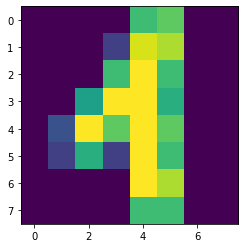

In [9]:
plt.imshow(df.images[200].reshape(8,8))
print(df.target[200])

In [6]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [175]:
X, y =df.data, df.target

In [176]:
X.shape

(1797, 64)

In [177]:
from sklearn.model_selection import train_test_split

In [178]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.3, random_state=42 )

In [179]:
X_train[0]

array([ 0.,  0.,  5., 13., 13.,  8.,  0.,  0.,  0.,  0., 16., 11., 13.,
       16.,  6.,  0.,  0.,  1., 16.,  5.,  2., 14.,  9.,  0.,  0.,  0.,
        9., 16., 16., 15.,  0.,  0.,  0.,  0., 10., 16., 14., 14.,  0.,
        0.,  0.,  5., 15.,  4.,  0., 16.,  6.,  0.,  0.,  6., 14.,  7.,
        6., 16.,  4.,  0.,  0.,  0.,  7., 15., 16., 10.,  0.,  0.])

In [180]:
print(y_train[0])
X_train[0].reshape(8,8)

8


array([[ 0.,  0.,  5., 13., 13.,  8.,  0.,  0.],
       [ 0.,  0., 16., 11., 13., 16.,  6.,  0.],
       [ 0.,  1., 16.,  5.,  2., 14.,  9.,  0.],
       [ 0.,  0.,  9., 16., 16., 15.,  0.,  0.],
       [ 0.,  0., 10., 16., 14., 14.,  0.,  0.],
       [ 0.,  5., 15.,  4.,  0., 16.,  6.,  0.],
       [ 0.,  6., 14.,  7.,  6., 16.,  4.,  0.],
       [ 0.,  0.,  7., 15., 16., 10.,  0.,  0.]])

Text(0.5, 1.0, '7')

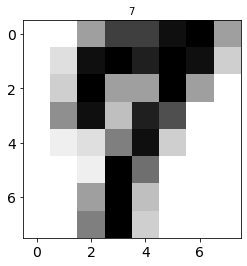

In [181]:
plt.imshow(X_train[100].reshape(8,8), cmap=plt.cm.binary)
plt.title( y_train[100])

In [182]:
from sklearn.ensemble import  RandomForestClassifier

In [183]:
model=RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [184]:
y_pred=model.predict(X_test)

In [185]:
model.score(X_test, y_test)

0.9722222222222222

In [186]:
from sklearn.metrics import accuracy_score

In [187]:
accuracy_score(y_pred, y_test)

0.9722222222222222

In [189]:
X_test[230], y_test[230]

(array([ 0.,  1., 10., 15., 11.,  1.,  0.,  0.,  0.,  3.,  8.,  8., 11.,
        12.,  0.,  0.,  0.,  0.,  0.,  5., 14., 15.,  1.,  0.,  0.,  0.,
         0., 11., 15.,  2.,  0.,  0.,  0.,  0.,  0.,  4., 15.,  2.,  0.,
         0.,  0.,  0.,  0.,  0., 12., 10.,  0.,  0.,  0.,  0.,  3.,  4.,
        10., 16.,  1.,  0.,  0.,  0., 13., 16., 15., 10.,  0.,  0.]), 3)

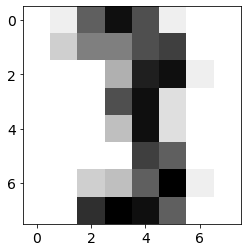

In [195]:
plt.imshow(X_test[230].reshape(8,8), cmap=plt.cm.binary)

In [196]:
X_test[230].reshape(1,-1).shape

(1, 64)

In [197]:
model.predict(X_test[230].reshape(1,-1))

array([3])

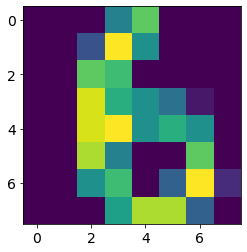

In [112]:
plt.imshow(X_test[0].reshape(8,8))


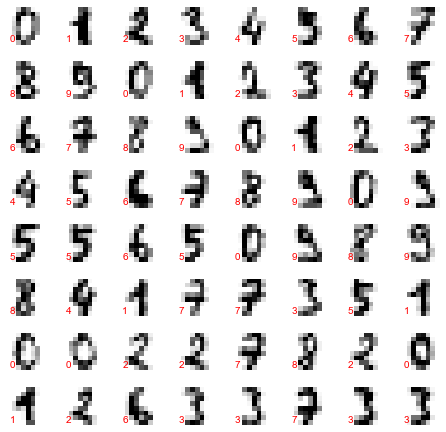

In [484]:
fig=plt.figure(figsize=(6,6))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.5)
for i in range(64):
    ax=fig.add_subplot(8,8, i+1, xticks=[], yticks=[])
    ax.imshow(df.images[i])
    ax.text(0,7, str(df.target[i]), c="r")

# build the model 

In [486]:
from sklearn.ensemble import RandomForestClassifier

In [487]:
X_train, X_test, y_train, y_test=train_test_split(df.data, df.target, test_size=.3, random_state=42 )

In [489]:
model=RandomForestClassifier(n_estimators=1000)
model.fit(X_train, y_train)
y_pred=model.predict(X_test)

In [113]:
from sklearn.metrics import classification_report

In [114]:
print(classification_reportxgb(y_pred, y_test))

NameError: name 'classification_reportxgb' is not defined

# confusion Matrix 

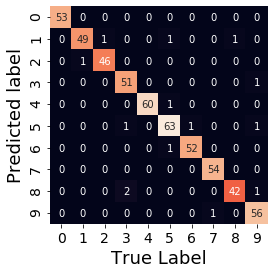

In [115]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
mat=confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel("True Label")
plt.ylabel("Predicted label")
plt.show()

# Selecting a model

## fold cross-validation on Logistic Regression

In [ ]:
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
scores = cross_val_score(logreg, X_train, y_train, cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

## fold cross-validation on Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=1, 
                            n_estimators=40,
                            min_samples_split=4,
                            min_samples_leaf=2)
scores = cross_val_score(rf, X_train, y_train, cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

#  Testing the model
## Data cleaning on test set

In [ ]:
X_test.drop(["name", "cabin", "ticket", "boat", "body", "home.dest"], axis=1, inplace=True)
X_test["age"].fillna(X_train["age"].median(), inplace=True)
X_test["fare"].fillna(X_train["fare"].median(), inplace=True)
X_test["embarked"].fillna("S", inplace=True)

embarked_codes = {"S": 0, "C": 1, "Q": 2}  # new values for embarked column
X_test.replace({"embarked": embarked_codes}, inplace=True)

sex_codes = {"female": 0, "male": 1}  # new values for sex column
X_test.replace({"sex": sex_codes}, inplace=True)

In [ ]:
logreg.fit(X_train, y_train)
score_pred = logreg.score(X_test, y_test)

print("Accuracy: %0.2f" % (score_pred))

# LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
#           intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
#           penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
#           verbose=0, warm_start=False)

## Testing Random Forest model

In [ ]:
rf.fit(X_train, y_train)
score_pred = rf.score(X_test, y_test)

print("Accuracy: %0.2f" % (score_pred))
# RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
#             max_depth=None, max_features='auto', max_leaf_nodes=None,
#             min_samples_leaf=2, min_samples_split=4,
#             min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=1,
#             oob_score=False, random_state=1, verbose=0, warm_start=False)

## Feature ranking in Logistic Regression

In [ ]:
import numpy as np

lr_importances = np.abs(logreg.coef_)[0]
lr_indices = np.argsort(lr_importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

lr_labels = []
for f in range(X_train.shape[1]):
    lr_labels.append(X_train.columns.values[lr_indices[f]])
    print("%d) %s (%f)" % (f + 1, lr_labels[f], lr_importances[lr_indices[f]]))

## Feature ranking in Random Forest

In [ ]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

labels = []
for f in range(X_train.shape[1]):
    labels.append(X_train.columns.values[indices[f]])
    print("%d) %s (%f)" % (f + 1, labels[f], importances[indices[f]]))

In [10]:
import matplotlib.pyplot as plt
ts = Series(randn(1000), index=date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()
plt.show()

NameError: name 'Series' is not defined

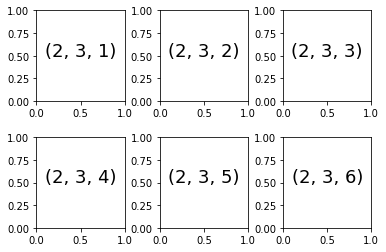

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1, 7):
    ax = fig.add_subplot(2, 3, i)
    ax.text(0.5, 0.5, str((2, 3, i)),
           fontsize=18, ha='center')
plt.show()

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
tips = sns.load_dataset("tips")

# define sizes for labels, ticks, text, ...
# as defined here https://stackoverflow.com/questions/3899980/how-to-change-the-font-size-on-a-matplotlib-plot
SMALL_SIZE = 10
MEDIUM_SIZE = 14
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

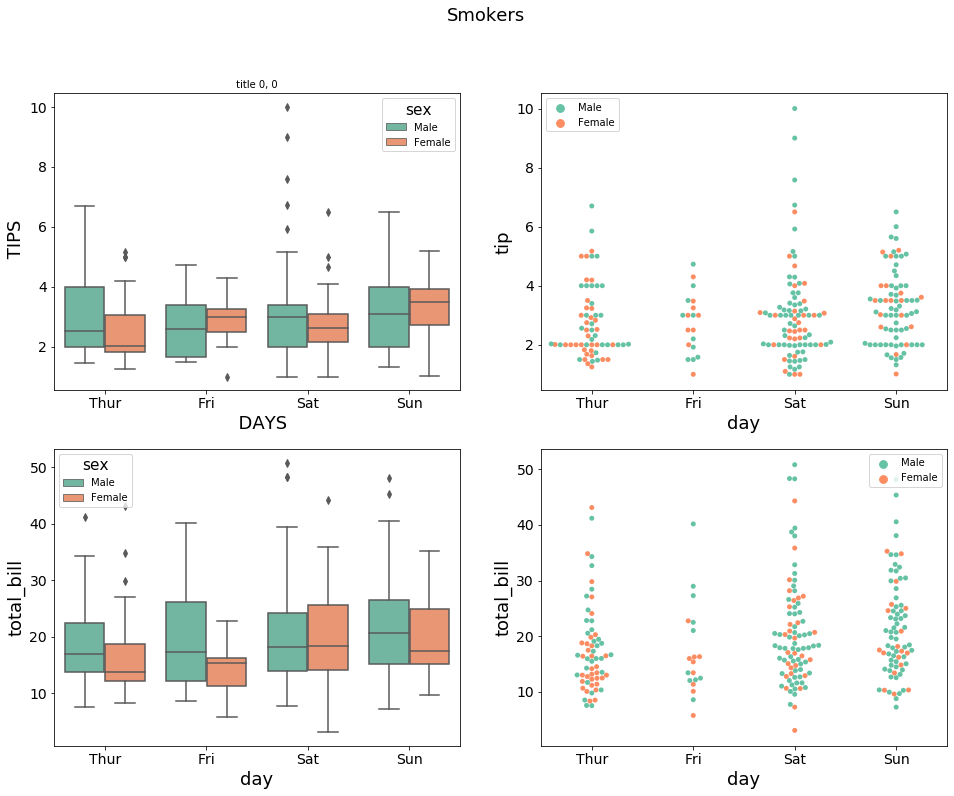

In [32]:
# create figure
fig,ax = plt.subplots(nrows=2, ncols=2, figsize=(16,12))
ylim = (0,1)
ax[0,0]=sns.boxplot(x= 'day', y= 'tip', hue="sex",              data=tips, palette="Set2", ax=ax[0,0])
ax[0,0].set(title=" title 0, 0 ", xlabel="  DAYS", ylabel=" TIPS")
ax[0,1]=sns.swarmplot(x= 'day', y= 'tip', hue="sex",            data=tips, palette="Set2", ax=ax[0,1])
ax[0,1].legend(loc='upper left')

ax[1,0]=sns.boxplot(x= 'day', y= 'total_bill', hue="sex",      data=tips, palette="Set2", ax=ax[1,0])
ax[1,1]=sns.swarmplot(x= 'day', y= 'total_bill', hue="sex",     data=tips, palette="Set2", ax=ax[1,1])

plt.suptitle('Smokers')
plt.legend(loc='upper right')

plt.savefig('test.png', dpi = 150)
plt.show()

In [109]:
from sklearn.datasets import load_diabetes 
import xgboost as xgb
diabetes = load_diabetes()

X = diabetes.data
y = diabetes.target

xgb_model = xgb.XGBRegressor()

params = {
    "colsample_bytree": uniform(0.7, 0.3),
    "gamma": np.random.uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.3), # default 0.1 
    "max_depth": randint(2, 6), # default 3
    "n_estimators": randint(100, 150), # default 100
    "subsample": uniform(0.6, 0.4)
}

search = RandomizedSearchCV(xgb_model, param_distributions=params, random_state=42, n_iter=200, cv=3, verbose=1, n_jobs=1, return_train_score=False)

search.fit(X, y)

report_best_scores(search.cv_results_, 1)


NameError: name 'uniform' is not defined

###.  

In [ ]:
pipe = Pipeline(steps=[("Imputer", Imputer()),
                      ("XGB", XGBRegressor())])

xgb_hyperparams = {'XGB__n_estimators': [1000, 2000, 3000],
                   'XGB__learning_rate': [0.01, 0.03, 0.05, 0.07],
                   'XGB__max_depth': [3, 4, 5]}

fit_parameters = {'XGB__early_stopping_rounds': 5,
              'XGB__eval_metric': 'mae',
              'XGB__eval_set': [(val_X, val_y)],
              'XGB__verbose': False}

grid_search = GridSearchCV(pipe,
                          xgb_hyperparams,
                          #fit_params=fit_parameters,
                          scoring='neg_mean_squared_error',
                          cv=5,
                          n_jobs=1,
                          verbose=3)

grid_search.fit(train_X, train_y, fit_params=fit_parameters)

# Why pipeLine

In [ ]:
  vect = CountVectorizer()
    tfidf = TfidfTransformer()
    clf = SGDClassifier()

    vX = vect.fit_transform(Xtrain)
    tfidfX = tfidf.fit_transform(vX)
    predicted = clf.fit_predict(tfidfX)

    # Now evaluate all steps on test set
    vX = vect.fit_transform(Xtest)
    tfidfX = tfidf.fit_transform(vX)
    predicted = clf.fit_predict(tfidfX)
    
    
    
    
#With just:

pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', SGDClassifier()),
])
predicted = pipeline.fit(Xtrain).predict(Xtrain)
# Now evaluate all steps on test set
predicted = pipeline.predict(Xtest)

In [76]:
from sklearn import  datasets, svm
from sklearn.model_selection import GridSearchCV
import pandas as pd
iris = datasets.load_iris()

parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svr = svm.SVC()
clf = GridSearchCV(svr, parameters)
clf.fit(iris.data, iris.target)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [77]:
df=pd.DataFrame(iris.data)
df.head()
df["predict"]=clf.predict(iris.data)
df["target"]=iris.target

In [59]:
from sklearn import svm
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import f1_score, accuracy_score

# prepare dataset
iris = load_iris()
X = iris.data[:, :2]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [69]:
# svm classification
clf = svm.SVC(kernel='rbf', gamma=0.7, C = 1.0).fit(X_train, y_train)
y_predicted = clf.predict(X_test)

# performance
print ("Classification report for %s" % clf)
print (metrics.classification_report(y_test, y_predicted))

print("F1 micro: %1.4f\n"%(f1_score(y_test, y_predicted, average='micro')))
print("F1 macro: %1.4f\n" % (f1_score(y_test, y_predicted, average='macro')))
print("F1 weighted: %1.4f\n" % (f1_score(y_test, y_predicted, average='weighted')))
print("Accuracy: %1.4f" % (accuracy_score(y_test, y_predicted)))

Classification report for SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.7, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.67      0.91      0.77        11
           2       0.83      0.50      0.62        10

    accuracy                           0.80        30
   macro avg       0.83      0.80      0.80        30
weighted avg       0.82      0.80      0.79        30

F1 micro: 0.8000

F1 macro: 0.7981

F1 weighted: 0.7904

Accuracy: 0.8000


# Dimensionality Reduction with Neighborhood Components Analysis¶


In [116]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import (KNeighborsClassifier,
                               NeighborhoodComponentsAnalysis)
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

print(__doc__)

n_neighbors = 3
random_state = 0

# Load Digits dataset
X, y = datasets.load_digits(return_X_y=True)

# Split into train/test
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.5, stratify=y,
                     random_state=random_state)


Automatically created module for IPython interactive environment


In [117]:

dim = len(X[0])
n_classes = len(np.unique(y))

# Reduce dimension to 2 with PCA
pca = make_pipeline(StandardScaler(),
                    PCA(n_components=2, random_state=random_state))

# Reduce dimension to 2 with LinearDiscriminantAnalysis
lda = make_pipeline(StandardScaler(),
                    LinearDiscriminantAnalysis(n_components=2))

# Reduce dimension to 2 with NeighborhoodComponentAnalysis
nca = make_pipeline(StandardScaler(),
                    NeighborhoodComponentsAnalysis(n_components=2,
                                                   random_state=random_state))

# Use a nearest neighbor classifier to evaluate the methods
knn = KNeighborsClassifier(n_neighbors=n_neighbors)

# Make a list of the methods to be compared
dim_reduction_methods = [('PCA', pca), ('LDA', lda), ('NCA', nca)]

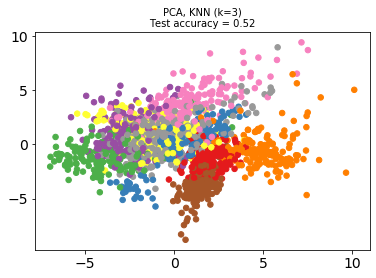

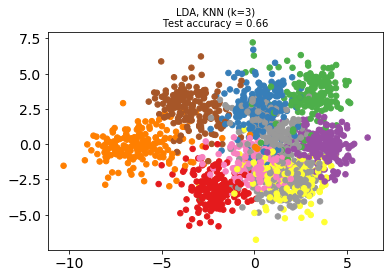

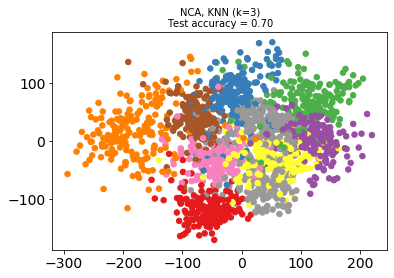

In [118]:
# plt.figure()
for i, (name, model) in enumerate(dim_reduction_methods):
    plt.figure()
    # plt.subplot(1, 3, i + 1, aspect=1)

    # Fit the method's model
    model.fit(X_train, y_train)

    # Fit a nearest neighbor classifier on the embedded training set
    knn.fit(model.transform(X_train), y_train)

    # Compute the nearest neighbor accuracy on the embedded test set
    acc_knn = knn.score(model.transform(X_test), y_test)

    # Embed the data set in 2 dimensions using the fitted model
    X_embedded = model.transform(X)

    # Plot the projected points and show the evaluation score
    plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y, s=30, cmap='Set1')
    plt.title("{}, KNN (k={})\nTest accuracy = {:.2f}".format(name,
                                                              n_neighbors,
                                                              acc_knn))
plt.show()

In [3]:
# import data science and visualization libraries
%matplotlib inline
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/covtype/covtype.data.gz
!gunzip covtype.data.gz

dyld: Library not loaded: /usr/local/opt/openssl/lib/libssl.1.0.0.dylib
  Referenced from: /usr/local/bin/wget
  Reason: image not found
gunzip: can't stat: covtype.data.gz (covtype.data.gz.gz): No such file or directory


In [7]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import  KFold
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import accuracy_score

iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)


sc = StandardScaler()
X_train_scale = sc.fit_transform(X_train)
X_test_scale = sc.transform(X_test)


In [ ]:

numFolds = 10
kf = KFold(len(y_train), numFolds, shuffle=True)

# These are "Class objects". For each Class, find the AUC through
# 10 fold cross validation.
Models = [LogisticRegression, svm.SVC]
params = [{},{}]



In [ ]:
for param, Model in zip(params, Models):
    total = 0
    for train_indices, test_indices in kf:

        train_X = X_train[train_indices]; train_Y = y_train[train_indices]
        test_X = X_train[test_indices]; test_Y = y_train[test_indices]

        reg = Model(**param)
        reg.fit(train_X, train_Y)
        predictions = reg.predict(test_X)
        total += accuracy_score(test_Y, predictions)
    accuracy = total / numFolds

    print ("CV accuracy score of {0}: {1}".format(Model.__name__, round(accuracy, 6)))

In [10]:
from sklearn  import   datasets
import pandas as pd
iris=datasets.load_iris()

In [16]:
df= pd.DataFrame(iris.data, columns=iris.feature_names)
df["flower"]=iris.target
df["flower"]=df["flower"].apply( lambda x: iris.target_names[x])
df[47:53]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower
47,4.6,3.2,1.4,0.2,setosa
48,5.3,3.7,1.5,0.2,setosa
49,5.0,3.3,1.4,0.2,setosa
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor


In [43]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test= train_test_split(iris.data, iris.target, test_size=0.3)

In [34]:
from sklearn.svm import SVC

model=SVC(kernel="rbf", C=30, gamma="auto")
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9333333333333333

In [35]:
from sklearn.model_selection import cross_val_score

In [36]:
cross_val_score(SVC(kernel="linear", C=10, gamma="auto"), iris.data, iris.target, cv=5)

array([1.        , 1.        , 0.9       , 0.96666667, 1.        ])

In [37]:
cross_val_score(SVC(kernel="rbf", C=10, gamma="auto"), iris.data, iris.target, cv=5)

array([0.96666667, 1.        , 0.96666667, 0.96666667, 1.        ])

In [38]:
cross_val_score(SVC(kernel="rbf", C=20, gamma="auto"), iris.data, iris.target, cv=5)

array([0.96666667, 1.        , 0.9       , 0.96666667, 1.        ])

In [39]:
import numpy as np

In [40]:

kernels=["rbf", "linear"]
C=[1, 10, 20 ]
avg_score={}
for kval in kernels:
    for cval in C:
        cv_score=cross_val_score(SVC(kernel=kval, C=cval, gamma="auto"), iris.data, iris.target, cv=5)
        avg_score[kval+"_"+str(cval)]=np.average(cv_score)
avg_score

{'rbf_1': 0.9800000000000001,
 'rbf_10': 0.9800000000000001,
 'rbf_20': 0.9666666666666668,
 'linear_1': 0.9800000000000001,
 'linear_10': 0.9733333333333334,
 'linear_20': 0.9666666666666666}

In [47]:
from sklearn.model_selection import GridSearchCV
clf= GridSearchCV(   SVC( gamma="auto"), {
    "kernel":["rbf", "linear"],
    "C":[1, 10, 20 ]}, cv=5, return_train_score=False
                 )
clf.fit(iris.data, iris.target)
clf.cv_results_

{'mean_fit_time': array([0.00130377, 0.00062523, 0.00070081, 0.00063057, 0.00073495,
        0.00065188]),
 'std_fit_time': array([2.93073971e-04, 2.73001662e-05, 2.56366388e-05, 7.03934075e-05,
        7.69223618e-05, 1.19630584e-04]),
 'mean_score_time': array([0.00084085, 0.00040245, 0.00042281, 0.00040894, 0.0004343 ,
        0.00043468]),
 'std_score_time': array([4.21057023e-04, 8.23286661e-06, 4.76741781e-06, 2.06704371e-05,
        3.93281112e-05, 5.09864472e-05]),
 'param_C': masked_array(data=[1, 1, 10, 10, 20, 20],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['rbf', 'linear', 'rbf', 'linear', 'rbf', 'linear'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1, 'kernel': 'rbf'},
  {'C': 1, 'kernel': 'linear'},
  {'C': 10, 'kernel': 'rbf'},
  {'C': 10, 'kernel': 'linear'},
  {'C': 20, 'ker

In [49]:
df=pd.DataFrame(clf.cv_results_)
df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001304,0.000293,0.000841,0.000421,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.966667,1.0,0.966667,0.966667,1.0,0.980000,0.016330,1
1,0.000625,0.000027,0.000402,0.000008,1,linear,"{'C': 1, 'kernel': 'linear'}",0.966667,1.0,0.966667,0.966667,1.0,0.980000,0.016330,1
2,0.000701,0.000026,0.000423,0.000005,10,rbf,"{'C': 10, 'kernel': 'rbf'}",0.966667,1.0,0.966667,0.966667,1.0,0.980000,0.016330,1
3,0.000631,0.000070,0.000409,0.000021,10,linear,"{'C': 10, 'kernel': 'linear'}",1.000000,1.0,0.900000,0.966667,1.0,0.973333,0.038873,4
4,0.000735,0.000077,0.000434,0.000039,20,rbf,"{'C': 20, 'kernel': 'rbf'}",0.966667,1.0,0.900000,0.966667,1.0,0.966667,0.036515,5


In [50]:
df[["param_C", "param_kernel", "mean_test_score"]]

,param_C,param_kernel,mean_test_score
0,1,rbf,0.980000
1,1,linear,0.980000
2,10,rbf,0.980000
3,10,linear,0.973333
4,20,rbf,0.966667
5,20,linear,0.966667


In [52]:
clf.best_params_

{'C': 1, 'kernel': 'rbf'}

In [54]:
clf.best_score_.round(2)

0.98

In [62]:
from sklearn.model_selection import RandomizedSearchCV
clf=RandomizedSearchCV(   SVC( gamma="auto"), {
    "kernel":["rbf", "linear"],
    "C":[1, 10, 20 ]}, cv=5, return_train_score=False, n_iter=2
                 )
clf.fit(iris.data, iris.target)
clf.cv_results_

{'mean_fit_time': array([0.00097189, 0.00066266]),
 'std_fit_time': array([3.32407167e-04, 9.25433439e-05]),
 'mean_score_time': array([0.00091877, 0.00046606]),
 'std_score_time': array([0.00087236, 0.00013459]),
 'param_kernel': masked_array(data=['linear', 'linear'],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'param_C': masked_array(data=[1, 10],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'params': [{'kernel': 'linear', 'C': 1}, {'kernel': 'linear', 'C': 10}],
 'split0_test_score': array([0.96666667, 1.        ]),
 'split1_test_score': array([1., 1.]),
 'split2_test_score': array([0.96666667, 0.9       ]),
 'split3_test_score': array([0.96666667, 0.96666667]),
 'split4_test_score': array([1., 1.]),
 'mean_test_score': array([0.98      , 0.97333333]),
 'std_test_score': array([0.01632993, 0.03887301]),
 'rank_test_score': array([1, 2], dtype=int32)}

In [63]:
df=pd.DataFrame(clf.cv_results_)
df[["param_C", "param_kernel", "mean_test_score"]]

,param_C,param_kernel,mean_test_score
0,1,linear,0.980000
1,10,linear,0.973333


In [64]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [92]:
model_param={
    "svm":{
        "model":svm.SVC(gamma="auto"),
        "params":{
            "C":[1,10,20],
            "kernel":["rbf", "linear"]
        }
    },
    "randomforest":{
        "model":RandomForestClassifier(),
        "params":{
            "n_estimators":[1,5,10]
        }
    },
    "logistic_regression":{
        "model":LogisticRegression(solver="liblinear", multi_class="auto"),
        "params":{
            "C":[1,5,10],
        }
    }
}

In [101]:
score=[]
for model, mp in model_param.items():
    clf=GridSearchCV(mp["model"], mp["params"], cv=5, return_train_score=False)
    clf.fit(iris.data, iris.target)
    score.append({
        "model":model,
        "best_score": clf.best_score_,
        "best_params":clf.best_params_
    })
df=pd.DataFrame(score,  columns=["model", "best_score", "best_params"])
df

,model,best_score,best_params
0,svm,0.980000,"{'C': 1, 'kernel': 'rbf'}"
1,randomforest,0.953333,{'n_estimators': 5}
2,logistic_regression,0.966667,{'C': 5}


# Variance threshold

In [117]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

In [176]:
iris=load_iris()
X=iris.data
y=iris.target

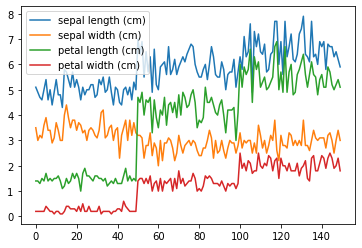

In [119]:
plt.plot(X)
plt.legend(iris.feature_names)

In [120]:
X.var(axis=0)

array([0.68112222, 0.18871289, 3.09550267, 0.57713289])

In [123]:
selector=VarianceThreshold(threshold=0.2)
selector.fit_transform(X)
# get_support renvoie quelle sont les variables qui étaient sélctionnées
selector.get_support()

array([ True, False,  True,  True])

In [126]:
np.array(iris.feature_names)[selector.get_support()]

array(['sepal length (cm)', 'petal length (cm)', 'petal width (cm)'],
      dtype='<U17')

In [127]:
from sklearn.feature_selection import chi2 , SelectKBest

In [129]:
chi2(X, y )
# dépendance , mieux c'est élevé mieux c'est dépendant
# P-value 

(array([ 10.81782088,   3.7107283 , 116.31261309,  67.0483602 ]),
 array([4.47651499e-03, 1.56395980e-01, 5.53397228e-26, 2.75824965e-15]))

In [133]:
selector=SelectKBest(chi2, k=1)
selector.fit_transform(X, y )
# renvoie les donnés de la 3ieme variabel duDta , celel qui a un  
#haut degré de dépendance avec un chi2= 116.31(regard een Haut 116.312)

array([[1.4],
       [1.4],
       [1.3],
       [1.5],
       [1.4],
       [1.7],
       [1.4],
       [1.5],
       [1.4],
       [1.5],
       [1.5],
       [1.6],
       [1.4],
       [1.1],
       [1.2],
       [1.5],
       [1.3],
       [1.4],
       [1.7],
       [1.5],
       [1.7],
       [1.5],
       [1. ],
       [1.7],
       [1.9],
       [1.6],
       [1.6],
       [1.5],
       [1.4],
       [1.6],
       [1.6],
       [1.5],
       [1.5],
       [1.4],
       [1.5],
       [1.2],
       [1.3],
       [1.4],
       [1.3],
       [1.5],
       [1.3],
       [1.3],
       [1.3],
       [1.6],
       [1.9],
       [1.4],
       [1.6],
       [1.4],
       [1.5],
       [1.4],
       [4.7],
       [4.5],
       [4.9],
       [4. ],
       [4.6],
       [4.5],
       [4.7],
       [3.3],
       [4.6],
       [3.9],
       [3.5],
       [4.2],
       [4. ],
       [4.7],
       [3.6],
       [4.4],
       [4.5],
       [4.1],
       [4.5],
       [3.9],
       [4.8],
      

In [134]:
# pour le vérifier 
selector.get_support()

array([False, False,  True, False])

In [177]:
# Avec un k=2. on aura
selector=SelectKBest(chi2, k=2)
selector.fit_transform(X, y )
selector.get_support()


array([False, False,  True,  True])

In [172]:
from sklearn.feature_selection  import SelectFromModel
from sklearn.linear_model import SGDClassifier

In [173]:
selector=SelectFromModel(SGDClassifier(random_state=0), threshold="mean")
selector.fit_transform(X, y )
selector.get_support()

array([False, False,  True,  True])

In [174]:
selector.estimator_.coef_

array([[  8.64029104,  27.2851296 , -40.01819009, -17.73533424],
       [ -5.48888269, -58.79616709,  22.88584985, -54.14457159],
       [-81.28026953, -75.17372078, 130.76437145, 131.39608339]])

In [175]:
selector.estimator_.coef_.mean(axis=0)

array([-26.04295373, -35.56158609,  37.87734374,  19.83872585])

In [146]:
selector.estimator_.coef_.mean(axis=0).mean()

-0.9721175565229512

# recursif Feature Selection 

In [169]:
from sklearn.feature_selection import RFE, RFECV

In [170]:
selector=RFECV(SGDClassifier(), step =1, min_features_to_select=2, cv=5)

In [171]:
selector.fit(X, y )
selector.ranking_
selector.grid_scores_

array([0.87333333, 0.86      , 0.86      ])

# Percentage Change

In [167]:
import pandas as pd
prices = [30.4, 32.5, 31.7, 31.2, 32.7, 34.1, 35.8, 37.8, 36.3, 36.3, 35.6]

price_series = pd.Series(prices)
price_series.pct_change().agg(["mean", "median", "max"])

mean      0.016633
median    0.021407
max       0.069079
dtype: float64

In [168]:
price_series = pd.Series(prices)
price_series.pct_change()

0          NaN
1     0.069079
2    -0.024615
3    -0.015773
4     0.048077
5     0.042813
6     0.049853
7     0.055866
8    -0.039683
9     0.000000
10   -0.019284
dtype: float64